In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iplDataFrame = pd.read_csv("ipl dataset.csv")
iplDataFrame.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,balls_remaining,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,4/5/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,NaN,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,4/6/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,1.0,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,4/7/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,31.0,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,4/8/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,6.0,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,4/8/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,NaN,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
clutchVariables = iplDataFrame[['team1','team2','winner','win_by_runs','win_by_wickets','balls_remaining']].fillna(-1)
clutchVariables.head()

,team1,team2,winner,win_by_runs,win_by_wickets,balls_remaining
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,35,0,-1.0
1,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,0,7,1.0
2,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,0,10,31.0
3,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,0,6,6.0
4,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,15,0,-1.0


In [4]:
clutchVariables['balls_remaining'] = clutchVariables['balls_remaining'].astype(int)

In [5]:
clutchVariables.dtypes

team1              object
team2              object
winner             object
win_by_runs         int64
win_by_wickets      int64
balls_remaining     int32
dtype: object

In [77]:
srhGames = clutchVariables[
                           (((clutchVariables["team1"] == "Sunrisers Hyderabad") 
                           | (clutchVariables["team1"] == "Deccan Chargers"))
                           | ((clutchVariables["team2"] == "Sunrisers Hyderabad")
                           | (clutchVariables["team2"] == "Deccan Chargers")))
                          ]
srhGames.head()

,team1,team2,winner,win_by_runs,win_by_wickets,balls_remaining
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,35,0,-1
5,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,0,9,27
9,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,0,4,8
13,Kolkata Knight Riders,Sunrisers Hyderabad,Kolkata Knight Riders,17,0,-1
18,Sunrisers Hyderabad,Kings XI Punjab,Sunrisers Hyderabad,5,0,-1


In [79]:
srhWinRatio = srhGames['winner'].value_counts(normalize=True)
srhWinRatio

Sunrisers Hyderabad            0.316940
Deccan Chargers                0.158470
Kolkata Knight Riders          0.092896
Chennai Super Kings            0.081967
Mumbai Indians                 0.071038
Rajasthan Royals               0.065574
Royal Challengers Bangalore    0.060109
Delhi Daredevils               0.060109
Kings XI Punjab                0.060109
Rising Pune Supergiant         0.010929
Delhi Capitals                 0.010929
Rising Pune Supergiants        0.005464
Pune Warriors                  0.005464
Name: winner, dtype: float64

In [6]:
cskCloseGames = clutchVariables[((clutchVariables["team1"] == "Chennai Super Kings") 
                                | (clutchVariables["team2"] == "Chennai Super Kings")) 
                                & (((clutchVariables["win_by_runs"] > 0 ) 
                                & (clutchVariables["win_by_runs"] < 5 ))
                                | ((clutchVariables["balls_remaining"] >= 0) & (clutchVariables["balls_remaining"] < 5))) ]
cskCloseGames

,team1,team2,winner,win_by_runs,win_by_wickets,balls_remaining
86,Delhi Daredevils,Chennai Super Kings,Chennai Super Kings,0,4,0
102,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,3,0,-1
113,Deccan Chargers,Chennai Super Kings,Chennai Super Kings,0,7,4
116,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,0,3,0
130,Chennai Super Kings,Deccan Chargers,Deccan Chargers,0,6,3
158,Chennai Super Kings,Royal Challengers Bangalore,Royal Challengers Bangalore,0,2,2
161,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,0,7,4
165,Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders,0,7,0
189,Kings XI Punjab,Chennai Super Kings,Kings XI Punjab,0,0,0
215,Chennai Super Kings,Deccan Chargers,Deccan Chargers,0,6,4


In [7]:
miCloseGames = clutchVariables[((clutchVariables["team1"] == "Mumbai Indians") 
                                | (clutchVariables["team2"] == "Mumbai Indians")) 
                                & (((clutchVariables["win_by_runs"] > 0 ) 
                                & (clutchVariables["win_by_runs"] < 5 ))
                                | ((clutchVariables["balls_remaining"] >= 0) & (clutchVariables["balls_remaining"] < 5))) ]
miCloseGames

,team1,team2,winner,win_by_runs,win_by_wickets,balls_remaining
1,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,0,7,1
6,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,0,4,1
15,Gujarat Lions,Mumbai Indians,Mumbai Indians,0,6,3
27,Rising Pune Supergiant,Mumbai Indians,Rising Pune Supergiant,3,0,-1
33,Gujarat Lions,Mumbai Indians,Mumbai Indians,0,0,0
36,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,0,5,0
58,Mumbai Indians,Rising Pune Supergiant,Mumbai Indians,1,0,-1
62,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,0,5,1
105,Kings XI Punjab,Mumbai Indians,Kings XI Punjab,1,0,-1
108,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,0,5,1


In [8]:
rrCloseGames = clutchVariables[((clutchVariables["team1"] == "Rajasthan Royals") 
                                | (clutchVariables["team2"] == "Rajasthan Royals")) 
                                & (((clutchVariables["win_by_runs"] > 0 ) 
                                & (clutchVariables["win_by_runs"] < 5 ))
                                | ((clutchVariables["balls_remaining"] >= 0) & (clutchVariables["balls_remaining"] < 5))) ]
rrCloseGames

,team1,team2,winner,win_by_runs,win_by_wickets,balls_remaining
67,Deccan Chargers,Rajasthan Royals,Rajasthan Royals,0,3,1
112,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,0,5,0
116,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,0,3,0
125,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,0,0,0
139,Deccan Chargers,Rajasthan Royals,Rajasthan Royals,0,3,2
159,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,2,0,-1
167,Rajasthan Royals,Kolkata Knight Riders,Kolkata Knight Riders,0,4,3
175,Mumbai Indians,Rajasthan Royals,Mumbai Indians,4,0,-1
209,Rajasthan Royals,Deccan Chargers,Rajasthan Royals,2,0,-1
270,Pune Warriors,Rajasthan Royals,Rajasthan Royals,0,6,3


In [9]:
kxipCloseGames = clutchVariables[((clutchVariables["team1"] == "Kings XI Punjab") 
                                | (clutchVariables["team2"] == "Kings XI Punjab")) 
                                & (((clutchVariables["win_by_runs"] > 0 ) 
                                & (clutchVariables["win_by_runs"] < 5 ))
                                | ((clutchVariables["balls_remaining"] >= 0) & (clutchVariables["balls_remaining"] < 5))) ]
kxipCloseGames

,team1,team2,winner,win_by_runs,win_by_wickets,balls_remaining
45,Kings XI Punjab,Gujarat Lions,Gujarat Lions,0,6,0
72,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,0,4,3
105,Kings XI Punjab,Mumbai Indians,Kings XI Punjab,1,0,-1
107,Deccan Chargers,Kings XI Punjab,Kings XI Punjab,0,6,3
111,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,0,3,2
134,Kings XI Punjab,Mumbai Indians,Kings XI Punjab,3,0,-1
141,Kolkata Knight Riders,Kings XI Punjab,Kings XI Punjab,0,6,0
150,Deccan Chargers,Kings XI Punjab,Kings XI Punjab,0,3,1
163,Kings XI Punjab,Deccan Chargers,Kings XI Punjab,1,0,-1
176,Kings XI Punjab,Delhi Daredevils,Delhi Daredevils,0,5,1


In [10]:
rcbCloseGames = clutchVariables[((clutchVariables["team1"] == "Royal Challengers Bangalore") 
                                | (clutchVariables["team2"] == "Royal Challengers Bangalore")) 
                                & (((clutchVariables["win_by_runs"] > 0 ) 
                                & (clutchVariables["win_by_runs"] < 5 ))
                                | ((clutchVariables["balls_remaining"] >= 0) & (clutchVariables["balls_remaining"] < 5))) ]
rcbCloseGames

,team1,team2,winner,win_by_runs,win_by_wickets,balls_remaining
36,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,0,5,0
62,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,0,5,1
110,Royal Challengers Bangalore,Deccan Chargers,Royal Challengers Bangalore,3,0,-1
128,Royal Challengers Bangalore,Delhi Daredevils,Delhi Daredevils,0,6,4
133,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,0,5,1
155,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,0,6,4
158,Chennai Super Kings,Royal Challengers Bangalore,Royal Challengers Bangalore,0,2,2
177,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,0,7,4
204,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore,0,6,4
213,Royal Challengers Bangalore,Deccan Chargers,Deccan Chargers,0,7,4


In [11]:
kkrCloseGames = clutchVariables[((clutchVariables["team1"] == "Kolkata Knight Riders") 
                                | (clutchVariables["team2"] == "Kolkata Knight Riders")) 
                                & (((clutchVariables["win_by_runs"] > 0 ) 
                                & (clutchVariables["win_by_runs"] < 5 ))
                                | ((clutchVariables["balls_remaining"] >= 0) & (clutchVariables["balls_remaining"] < 5))) ]
kkrCloseGames

,team1,team2,winner,win_by_runs,win_by_wickets,balls_remaining
6,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,0,4,1
17,Delhi Daredevils,Kolkata Knight Riders,Kolkata Knight Riders,0,4,1
39,Kolkata Knight Riders,Rising Pune Supergiant,Rising Pune Supergiant,0,4,4
56,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,0,7,4
102,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,3,0,-1
111,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,0,3,2
125,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,0,0,0
133,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,0,5,1
141,Kolkata Knight Riders,Kings XI Punjab,Kings XI Punjab,0,6,0
155,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,0,6,4


In [24]:
srhCloseGames = clutchVariables[(((clutchVariables["team1"] == "Sunrisers Hyderabad") 
                                | (clutchVariables["team1"] == "Deccan Chargers"))
                                | ((clutchVariables["team2"] == "Sunrisers Hyderabad")
                                | (clutchVariables["team2"] == "Deccan Chargers"))) 
                                & (((clutchVariables["win_by_runs"] > 0 ) 
                                & (clutchVariables["win_by_runs"] < 5 ))
                                | ((clutchVariables["balls_remaining"] >= 0) & (clutchVariables["balls_remaining"] < 5))) ]
srhCloseGames

,team1,team2,winner,win_by_runs,win_by_wickets,balls_remaining
24,Sunrisers Hyderabad,Rising Pune Supergiant,Rising Pune Supergiant,0,6,0
56,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,0,7,4
67,Deccan Chargers,Rajasthan Royals,Rajasthan Royals,0,3,1
107,Deccan Chargers,Kings XI Punjab,Kings XI Punjab,0,6,3
110,Royal Challengers Bangalore,Deccan Chargers,Royal Challengers Bangalore,3,0,-1
113,Deccan Chargers,Chennai Super Kings,Chennai Super Kings,0,7,4
130,Chennai Super Kings,Deccan Chargers,Deccan Chargers,0,6,3
139,Deccan Chargers,Rajasthan Royals,Rajasthan Royals,0,3,2
150,Deccan Chargers,Kings XI Punjab,Kings XI Punjab,0,3,1
162,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,0,6,0


In [21]:
ddCloseGames = clutchVariables[(((clutchVariables["team1"] == "Delhi Capitals") 
                                | (clutchVariables["team1"] == "Delhi Daredevils"))
                                | ((clutchVariables["team2"] == "Delhi Capitals")
                                | (clutchVariables["team2"] == "Delhi Daredevils"))) 
                                & (((clutchVariables["win_by_runs"] > 0 ) 
                                & (clutchVariables["win_by_runs"] < 5 ))
                                | ((clutchVariables["balls_remaining"] >= 0) & (clutchVariables["balls_remaining"] < 5))) ]
ddCloseGames

,team1,team2,winner,win_by_runs,win_by_wickets,balls_remaining
17,Delhi Daredevils,Kolkata Knight Riders,Kolkata Knight Riders,0,4,1
48,Gujarat Lions,Delhi Daredevils,Delhi Daredevils,0,2,2
72,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,0,4,3
86,Delhi Daredevils,Chennai Super Kings,Chennai Super Kings,0,4,0
108,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,0,5,1
128,Royal Challengers Bangalore,Delhi Daredevils,Delhi Daredevils,0,6,4
176,Kings XI Punjab,Delhi Daredevils,Delhi Daredevils,0,5,1
249,Pune Warriors,Delhi Daredevils,Delhi Daredevils,0,3,4
262,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,0,3,3
344,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils,1,0,-1


In [12]:
pwiCloseGames = clutchVariables[((clutchVariables["team1"] == "Pune Warriors") 
                                | (clutchVariables["team2"] == "Pune Warriors")) 
                                & (((clutchVariables["win_by_runs"] > 0 ) 
                                & (clutchVariables["win_by_runs"] < 5 ))
                                | ((clutchVariables["balls_remaining"] >= 0) & (clutchVariables["balls_remaining"] < 5))) ]
pwiCloseGames

,team1,team2,winner,win_by_runs,win_by_wickets,balls_remaining
249,Pune Warriors,Delhi Daredevils,Delhi Daredevils,0,3,4
253,Pune Warriors,Mumbai Indians,Mumbai Indians,0,7,0
263,Pune Warriors,Chennai Super Kings,Chennai Super Kings,0,8,3
270,Pune Warriors,Rajasthan Royals,Rajasthan Royals,0,6,3
294,Pune Warriors,Deccan Chargers,Deccan Chargers,0,6,4
323,Chennai Super Kings,Pune Warriors,Pune Warriors,0,7,4
328,Pune Warriors,Royal Challengers Bangalore,Royal Challengers Bangalore,0,6,0
350,Mumbai Indians,Pune Warriors,Mumbai Indians,1,0,-1
408,Pune Warriors,Kings XI Punjab,Kings XI Punjab,0,7,1
430,Pune Warriors,Rajasthan Royals,Rajasthan Royals,0,5,1


In [13]:
rpsgCloseGames = clutchVariables[(((clutchVariables["team1"] == "Rising Pune Supergiants") 
                                | (clutchVariables["team1"] == "Rising Pune Supergiant"))
                                | ((clutchVariables["team2"] == "Rising Pune Supergiants")
                                | (clutchVariables["team2"] == "Rising Pune Supergiant"))) 
                                & (((clutchVariables["win_by_runs"] > 0 ) 
                                & (clutchVariables["win_by_runs"] < 5 ))
                                | ((clutchVariables["balls_remaining"] >= 0) & (clutchVariables["balls_remaining"] < 5))) ]
rpsgCloseGames

,team1,team2,winner,win_by_runs,win_by_wickets,balls_remaining
1,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,0,7,1
24,Sunrisers Hyderabad,Rising Pune Supergiant,Rising Pune Supergiant,0,6,0
27,Rising Pune Supergiant,Mumbai Indians,Rising Pune Supergiant,3,0,-1
37,Gujarat Lions,Rising Pune Supergiant,Rising Pune Supergiant,0,5,1
39,Kolkata Knight Riders,Rising Pune Supergiant,Rising Pune Supergiant,0,4,4
58,Mumbai Indians,Rising Pune Supergiant,Mumbai Indians,1,0,-1
595,Rising Pune Supergiants,Kolkata Knight Riders,Kolkata Knight Riders,0,2,3
600,Rising Pune Supergiants,Gujarat Lions,Gujarat Lions,0,3,0
608,Delhi Daredevils,Rising Pune Supergiants,Rising Pune Supergiants,0,7,4
610,Rising Pune Supergiants,Royal Challengers Bangalore,Royal Challengers Bangalore,0,7,3


In [14]:
ktkCloseGames = clutchVariables[((clutchVariables["team1"] == "Kochi Tuskers Kerala") 
                                | (clutchVariables["team2"] == "Kochi Tuskers Kerala")) 
                                & (((clutchVariables["win_by_runs"] > 0 ) 
                                & (clutchVariables["win_by_runs"] < 5 ))
                                | ((clutchVariables["balls_remaining"] >= 0) & (clutchVariables["balls_remaining"] < 5))) ]
ktkCloseGames


,team1,team2,winner,win_by_runs,win_by_wickets,balls_remaining


In [15]:
cskclutchRatio = cskCloseGames['winner'].value_counts(normalize=True)
cskclutchRatio

Chennai Super Kings            0.604167
Mumbai Indians                 0.083333
Kolkata Knight Riders          0.083333
Royal Challengers Bangalore    0.062500
Rajasthan Royals               0.041667
Deccan Chargers                0.041667
Kings XI Punjab                0.041667
Sunrisers Hyderabad            0.020833
Pune Warriors                  0.020833
Name: winner, dtype: float64

In [16]:
kkrClutchRatio = kkrCloseGames['winner'].value_counts(normalize=True)
kkrClutchRatio

Kolkata Knight Riders          0.428571
Chennai Super Kings            0.142857
Mumbai Indians                 0.095238
Royal Challengers Bangalore    0.095238
Rajasthan Royals               0.071429
Kings XI Punjab                0.071429
Delhi Capitals                 0.023810
Deccan Chargers                0.023810
Rising Pune Supergiant         0.023810
Delhi Daredevils               0.023810
Name: winner, dtype: float64

In [17]:
miClutchRatio = miCloseGames['winner'].value_counts(normalize=True)
miClutchRatio

Mumbai Indians                 0.586957
Rajasthan Royals               0.086957
Kings XI Punjab                0.086957
Chennai Super Kings            0.065217
Royal Challengers Bangalore    0.043478
Rising Pune Supergiant         0.043478
Delhi Daredevils               0.043478
Sunrisers Hyderabad            0.021739
Gujarat Lions                  0.021739
Name: winner, dtype: float64

In [18]:
rrClutchRatio = rrCloseGames['winner'].value_counts(normalize=True)
rrClutchRatio

Rajasthan Royals         0.628571
Chennai Super Kings      0.114286
Mumbai Indians           0.085714
Kolkata Knight Riders    0.057143
Delhi Daredevils         0.057143
Kings XI Punjab          0.028571
Delhi Capitals           0.028571
Name: winner, dtype: float64

In [19]:
kxipClutchRatio = kxipCloseGames['winner'].value_counts(normalize=True)
kxipClutchRatio

Kings XI Punjab                0.487805
Mumbai Indians                 0.121951
Royal Challengers Bangalore    0.121951
Kolkata Knight Riders          0.073171
Delhi Daredevils               0.048780
Rajasthan Royals               0.024390
Chennai Super Kings            0.024390
Sunrisers Hyderabad            0.024390
Gujarat Lions                  0.024390
Rising Pune Supergiants        0.024390
Delhi Capitals                 0.024390
Name: winner, dtype: float64

In [22]:
ddClutchRatio = ddCloseGames['winner'].value_counts(normalize=True)
ddClutchRatio

Delhi Daredevils               0.342857
Chennai Super Kings            0.114286
Sunrisers Hyderabad            0.114286
Delhi Capitals                 0.114286
Kings XI Punjab                0.085714
Royal Challengers Bangalore    0.085714
Rajasthan Royals               0.028571
Mumbai Indians                 0.028571
Gujarat Lions                  0.028571
Kolkata Knight Riders          0.028571
Rising Pune Supergiants        0.028571
Name: winner, dtype: float64

In [25]:
srhClutchRatio = srhCloseGames['winner'].value_counts(normalize=True)
srhClutchRatio

Sunrisers Hyderabad            0.229167
Rajasthan Royals               0.145833
Chennai Super Kings            0.104167
Deccan Chargers                0.104167
Kings XI Punjab                0.104167
Kolkata Knight Riders          0.083333
Royal Challengers Bangalore    0.083333
Mumbai Indians                 0.062500
Delhi Daredevils               0.041667
Rising Pune Supergiant         0.020833
Delhi Capitals                 0.020833
Name: winner, dtype: float64

In [26]:
rcbClutchRatio = rcbCloseGames['winner'].value_counts(normalize=True)
rcbClutchRatio

Royal Challengers Bangalore    0.560976
Chennai Super Kings            0.121951
Kolkata Knight Riders          0.073171
Rajasthan Royals               0.048780
Mumbai Indians                 0.048780
Sunrisers Hyderabad            0.048780
Deccan Chargers                0.024390
Kings XI Punjab                0.024390
Gujarat Lions                  0.024390
Delhi Daredevils               0.024390
Name: winner, dtype: float64

In [27]:
rpsgClutchRatio = rpsgCloseGames['winner'].value_counts(normalize=True)
rpsgClutchRatio

Rising Pune Supergiant         0.416667
Rising Pune Supergiants        0.166667
Mumbai Indians                 0.083333
Sunrisers Hyderabad            0.083333
Gujarat Lions                  0.083333
Kolkata Knight Riders          0.083333
Royal Challengers Bangalore    0.083333
Name: winner, dtype: float64

In [28]:
pwiClutchRatio = pwiCloseGames['winner'].value_counts(normalize=True)
pwiClutchRatio

Rajasthan Royals               0.2
Mumbai Indians                 0.2
Chennai Super Kings            0.1
Deccan Chargers                0.1
Kings XI Punjab                0.1
Royal Challengers Bangalore    0.1
Pune Warriors                  0.1
Delhi Daredevils               0.1
Name: winner, dtype: float64

In [29]:
cskNonCloseGames = clutchVariables[((clutchVariables["team1"] == "Chennai Super Kings") 
                                | (clutchVariables["team2"] == "Chennai Super Kings")) 
                                & ((clutchVariables["win_by_runs"] > 5 )
                                | ((clutchVariables["balls_remaining"] > 5))) ]
cskNonCloseGames.head()

,team1,team2,winner,win_by_runs,win_by_wickets,balls_remaining
60,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,33,0,-1
66,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,6,0,-1
70,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,0,9,18
73,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,13,0,-1
78,Chennai Super Kings,Delhi Daredevils,Delhi Daredevils,0,8,6


In [30]:
cskNonClutchRatio = cskNonCloseGames['winner'].value_counts(normalize=True)
cskNonClutchRatio

Chennai Super Kings            0.603604
Mumbai Indians                 0.117117
Kings XI Punjab                0.054054
Delhi Daredevils               0.054054
Rajasthan Royals               0.045045
Royal Challengers Bangalore    0.045045
Kolkata Knight Riders          0.027027
Sunrisers Hyderabad            0.018018
Deccan Chargers                0.018018
Pune Warriors                  0.009009
Kochi Tuskers Kerala           0.009009
Name: winner, dtype: float64

In [31]:
miNonCloseGames = clutchVariables[((clutchVariables["team1"] == "Mumbai Indians") 
                                | (clutchVariables["team2"] == "Mumbai Indians")) 
                                & ((clutchVariables["win_by_runs"] > 5 )
                                | ((clutchVariables["balls_remaining"] > 5))) ]

miNonCloseGames.head()

,team1,team2,winner,win_by_runs,win_by_wickets,balls_remaining
9,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,0,4,8
11,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,0,4,6
21,Kings XI Punjab,Mumbai Indians,Mumbai Indians,0,8,27
23,Mumbai Indians,Delhi Daredevils,Mumbai Indians,14,0,-1
43,Mumbai Indians,Delhi Daredevils,Mumbai Indians,146,0,-1


In [32]:
miNonClutchRatio = miNonCloseGames['winner'].value_counts(normalize=True)
miNonClutchRatio

Mumbai Indians                 0.585185
Delhi Daredevils               0.066667
Chennai Super Kings            0.059259
Kings XI Punjab                0.051852
Royal Challengers Bangalore    0.044444
Sunrisers Hyderabad            0.044444
Kolkata Knight Riders          0.044444
Rajasthan Royals               0.029630
Deccan Chargers                0.029630
Rising Pune Supergiants        0.007407
Gujarat Lions                  0.007407
Pune Warriors                  0.007407
Rising Pune Supergiant         0.007407
Delhi Capitals                 0.007407
Kochi Tuskers Kerala           0.007407
Name: winner, dtype: float64

In [33]:
rcbNonCloseGames = clutchVariables[((clutchVariables["team1"] == "Royal Challengers Bangalore") 
                                | (clutchVariables["team2"] == "Royal Challengers Bangalore")) 
                                & ((clutchVariables["win_by_runs"] > 5 )
                                | ((clutchVariables["balls_remaining"] > 5))) ]
rcbNonCloseGames.head()

,team1,team2,winner,win_by_runs,win_by_wickets,balls_remaining
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,35,0,-1
4,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,15,0,-1
7,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,0,8,27
11,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,0,4,6
16,Rising Pune Supergiant,Royal Challengers Bangalore,Rising Pune Supergiant,27,0,-1


In [34]:
rcbNonClutchRatio = rcbNonCloseGames['winner'].value_counts(normalize=True)
rcbNonClutchRatio

Royal Challengers Bangalore    0.465116
Mumbai Indians                 0.108527
Kings XI Punjab                0.085271
Chennai Super Kings            0.077519
Rajasthan Royals               0.062016
Kolkata Knight Riders          0.054264
Sunrisers Hyderabad            0.038760
Deccan Chargers                0.038760
Delhi Daredevils               0.031008
Rising Pune Supergiant         0.015504
Delhi Capitals                 0.015504
Gujarat Lions                  0.007752
Name: winner, dtype: float64

In [35]:
rrNonCloseGames = clutchVariables[((clutchVariables["team1"] == "Rajasthan Royals") 
                                | (clutchVariables["team2"] == "Rajasthan Royals")) 
                                & ((clutchVariables["win_by_runs"] > 5 )
                                | ((clutchVariables["balls_remaining"] > 5))) ]
rrNonCloseGames.head()

,team1,team2,winner,win_by_runs,win_by_wickets,balls_remaining
61,Rajasthan Royals,Delhi Daredevils,Delhi Daredevils,0,9,29
64,Kings XI Punjab,Rajasthan Royals,Rajasthan Royals,0,6,11
69,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,0,7,17
77,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,45,0,-1
82,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,0,8,34


In [36]:
rrNonClutchRatio = rrNonCloseGames['winner'].value_counts(normalize=True)
rrNonClutchRatio

Rajasthan Royals               0.457143
Chennai Super Kings            0.095238
Kings XI Punjab                0.076190
Kolkata Knight Riders          0.076190
Royal Challengers Bangalore    0.076190
Mumbai Indians                 0.066667
Sunrisers Hyderabad            0.057143
Delhi Daredevils               0.047619
Deccan Chargers                0.019048
Pune Warriors                  0.009524
Delhi Capitals                 0.009524
Kochi Tuskers Kerala           0.009524
Name: winner, dtype: float64

In [37]:
kxipNonCloseGames = clutchVariables[((clutchVariables["team1"] == "Kings XI Punjab") 
                                | (clutchVariables["team2"] == "Kings XI Punjab")) 
                                & ((clutchVariables["win_by_runs"] > 5 )
                                | ((clutchVariables["balls_remaining"] > 5))) ]

kxipNonCloseGames.head()

,team1,team2,winner,win_by_runs,win_by_wickets,balls_remaining
3,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,0,6,6
7,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,0,8,27
10,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,0,8,21
14,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,51,0,-1
21,Kings XI Punjab,Mumbai Indians,Mumbai Indians,0,8,27


In [38]:
kxipNonClutchRatio = kxipNonCloseGames['winner'].value_counts(normalize=True)
kxipNonClutchRatio

Kings XI Punjab                0.468750
Kolkata Knight Riders          0.109375
Chennai Super Kings            0.078125
Rajasthan Royals               0.070312
Mumbai Indians                 0.054688
Sunrisers Hyderabad            0.054688
Royal Challengers Bangalore    0.054688
Delhi Daredevils               0.054688
Pune Warriors                  0.023438
Deccan Chargers                0.015625
Rising Pune Supergiant         0.007812
Gujarat Lions                  0.007812
Name: winner, dtype: float64

In [39]:
kkrNonCloseGames = clutchVariables[((clutchVariables["team1"] == "Kolkata Knight Riders") 
                                | (clutchVariables["team2"] == "Kolkata Knight Riders")) 
                                & ((clutchVariables["win_by_runs"] > 5 )
                                | ((clutchVariables["balls_remaining"] > 5))) ]
kkrNonCloseGames.head()

,team1,team2,winner,win_by_runs,win_by_wickets,balls_remaining
2,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,0,10,31
10,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,0,8,21
13,Kolkata Knight Riders,Sunrisers Hyderabad,Kolkata Knight Riders,17,0,-1
22,Kolkata Knight Riders,Gujarat Lions,Gujarat Lions,0,4,10
26,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,82,0,-1


In [40]:
kkrNonClutchRatio = kkrNonCloseGames['winner'].value_counts(normalize=True)
kkrNonClutchRatio

Kolkata Knight Riders          0.539062
Mumbai Indians                 0.101562
Delhi Daredevils               0.054688
Rajasthan Royals               0.054688
Sunrisers Hyderabad            0.054688
Chennai Super Kings            0.046875
Royal Challengers Bangalore    0.046875
Kings XI Punjab                0.039062
Gujarat Lions                  0.023438
Kochi Tuskers Kerala           0.015625
Deccan Chargers                0.007812
Pune Warriors                  0.007812
Delhi Capitals                 0.007812
Name: winner, dtype: float64

In [41]:
ddNonCloseGames = clutchVariables[(((clutchVariables["team1"] == "Delhi Capitals") 
                                | (clutchVariables["team1"] == "Delhi Daredevils"))
                                | ((clutchVariables["team2"] == "Delhi Capitals")
                                | (clutchVariables["team2"] == "Delhi Daredevils"))) 
                                & ((clutchVariables["win_by_runs"] > 5 )
                                | ((clutchVariables["balls_remaining"] > 5))) ]
ddNonCloseGames.head()

,team1,team2,winner,win_by_runs,win_by_wickets,balls_remaining
4,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,15,0,-1
8,Delhi Daredevils,Rising Pune Supergiant,Delhi Daredevils,97,0,-1
14,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,51,0,-1
20,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,15,0,-1
23,Mumbai Indians,Delhi Daredevils,Mumbai Indians,14,0,-1


In [42]:
ddNonClutchRatio = ddNonCloseGames['winner'].value_counts(normalize=True)
ddNonClutchRatio

Delhi Daredevils               0.390977
Kolkata Knight Riders          0.090226
Mumbai Indians                 0.082707
Royal Challengers Bangalore    0.082707
Chennai Super Kings            0.075188
Kings XI Punjab                0.075188
Rajasthan Royals               0.060150
Delhi Capitals                 0.045113
Sunrisers Hyderabad            0.037594
Deccan Chargers                0.030075
Pune Warriors                  0.015038
Rising Pune Supergiants        0.007519
Kochi Tuskers Kerala           0.007519
Name: winner, dtype: float64

In [43]:
srhNonCloseGames = clutchVariables[(((clutchVariables["team1"] == "Sunrisers Hyderabad") 
                                | (clutchVariables["team1"] == "Deccan Chargers"))
                                | ((clutchVariables["team2"] == "Sunrisers Hyderabad")
                                | (clutchVariables["team2"] == "Deccan Chargers"))) 
                                & ((clutchVariables["win_by_runs"] > 5 )
                                | ((clutchVariables["balls_remaining"] > 5))) ]
srhNonCloseGames.head()

,team1,team2,winner,win_by_runs,win_by_wickets,balls_remaining
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,35,0,-1
5,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,0,9,27
9,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,0,4,8
13,Kolkata Knight Riders,Sunrisers Hyderabad,Kolkata Knight Riders,17,0,-1
20,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,15,0,-1


In [44]:
srhNonClutchRatio = srhNonCloseGames['winner'].value_counts(normalize=True)
srhNonClutchRatio

Sunrisers Hyderabad            0.349206
Deccan Chargers                0.182540
Kolkata Knight Riders          0.095238
Mumbai Indians                 0.079365
Chennai Super Kings            0.071429
Royal Challengers Bangalore    0.055556
Delhi Daredevils               0.055556
Kings XI Punjab                0.047619
Rajasthan Royals               0.031746
Rising Pune Supergiants        0.007937
Pune Warriors                  0.007937
Rising Pune Supergiant         0.007937
Delhi Capitals                 0.007937
Name: winner, dtype: float64

In [45]:
iplClutchNonClutch = pd.read_csv("iplClutchNonClutch.csv")
iplClutchNonClutch

,team,clutchRatio,nonClutchRatio
0,Chennai Super Kings,0.604167,0.603604
1,Delhi Capitals,0.457143,0.436090
2,Kings XI Punjab,0.487805,0.468750
3,Kolkata Knight Riders,0.428571,0.539062
4,Mumbai Indians,0.586957,0.585185
5,Rajasthan Royals,0.628571,0.457143
6,Royal Challengers Bangalore,0.560976,0.465116
7,Sunrisers Hyderabad,0.333334,0.531746


In [46]:
iplClutchNonClutch.dtypes

team               object
clutchRatio       float64
nonClutchRatio    float64
dtype: object

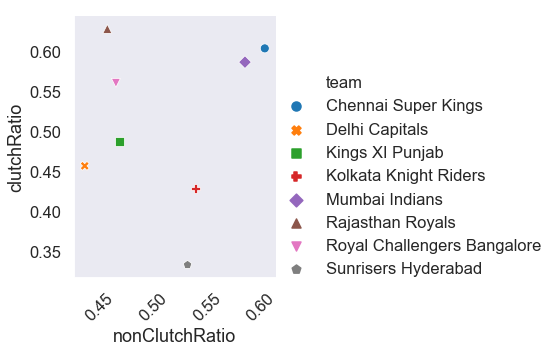

In [73]:
sns.set_style("dark")
sns.relplot(x="nonClutchRatio",y="clutchRatio",data=iplClutchNonClutch,kind="scatter",hue="team",style="team")
sns.set_context("paper")
plt.xticks(rotation = 45)
plt.show()